# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.290348e+01     1.517704e+01
 * time: 0.002362966537475586
     1     6.129129e+01     9.943146e+00
 * time: 0.006690025329589844
     2     5.525338e+01     1.328758e+01
 * time: 0.015837907791137695
     3     4.070931e+01     9.085276e+00
 * time: 0.027855873107910156
     4     3.211483e+01     8.746692e+00
 * time: 0.03967905044555664
     5     1.314933e+01     2.651635e+00
 * time: 0.05151104927062988
     6     9.486707e+00     3.981202e+00
 * time: 0.10203790664672852
     7     8.286182e+00     1.919818e+00
 * time: 0.11143207550048828
     8     8.218908e+00     5.915968e+00
 * time: 0.11844801902770996
     9     7.457061e+00     3.254953e+00
 * time: 0.12706398963928223
    10     7.215415e+00     4.286659e+00
 * time: 0.13405489921569824
    11     6.833943e+00     2.761270e+00
 * time: 0.14101195335388184
    12     6.430693e+00     2.253474e+00
 * time: 0.14796090126037598
    13     6.090362e+00     1.651903e+00
 * t

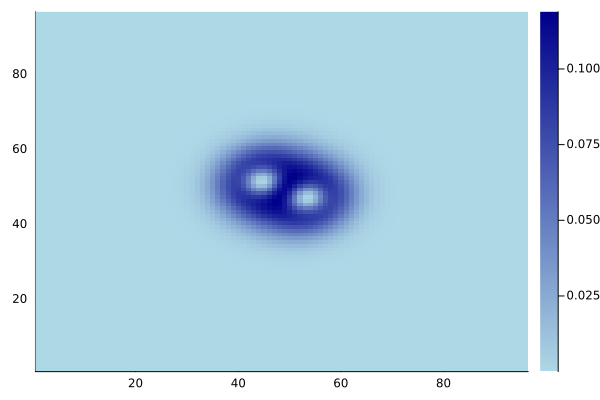

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)